In [1]:
# Load modules for data accessing and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter

In [2]:
df_train = pd.read_csv('../data/train.tsv', sep='\t')
df_train.set_index('train_id')
df_test = pd.read_csv('../data/test.tsv', sep='\t')
df_test.set_index('test_id')

,name,item_condition_id,category_name,brand_name,shipping,item_description
test_id,,,,,,
0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...
5,iPhone 6 Plus or 6s Plus Vodka pink case,1,"Electronics/Cell Phones & Accessories/Cases, C...",NaN,1,One Absolut Vodka in Pink for iPhone 6 Plus an...
6,Vintage Cameo Pendant & Brooch Pin,3,Women/Jewelry/Necklaces,Vintage,1,Two vintage Cameo pieces. 1. Silver metal Lock...
7,Rose Gold Stainless Steel Quartz Watch,1,Women/Women's Accessories/Watches,NaN,1,Brand new Price firm No trades Box included wi...
8,Daisy Marc Jacobs 3.4oz,3,Beauty/Fragrance/Women,MARC JACOBS,0,Brand new No box 100% authentic Firm price NO ...


In [3]:
print(df_train.shape)
print(df_test.shape)
print(df_train.head())
print(df_test.head())
print(df_train.index.name)
print(df_test.index.name)

(1482535, 8)
(693359, 7)
   train_id                                 name  item_condition_id  \
0         0  MLB Cincinnati Reds T Shirt Size XL                  3   
1         1     Razer BlackWidow Chroma Keyboard                  3   
2         2                       AVA-VIV Blouse                  1   
3         3                Leather Horse Statues                  1   
4         4                 24K GOLD plated rose                  1   

                                       category_name brand_name  price  \
0                                  Men/Tops/T-shirts        NaN   10.0   
1  Electronics/Computers & Tablets/Components & P...      Razer   52.0   
2                        Women/Tops & Blouses/Blouse     Target   10.0   
3                 Home/Home Décor/Home Décor Accents        NaN   35.0   
4                            Women/Jewelry/Necklaces        NaN   44.0   

   shipping                                   item_description  
0         1                           

In [4]:
# check variables in training set
#print(df_train['train_id'].describe())
print(df_train['name'].describe())
print(df_train['item_condition_id'].describe())
print(df_train['category_name'].describe())
print(df_train['brand_name'].describe())
print(df_train['price'].describe())
print(df_train['shipping'].describe())
print(df_train['item_description'].describe())

count     1482535
unique    1225273
top        Bundle
freq         2232
Name: name, dtype: object
count    1.482535e+06
mean     1.907380e+00
std      9.031586e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      5.000000e+00
Name: item_condition_id, dtype: float64
count                                            1476208
unique                                              1287
top       Women/Athletic Apparel/Pants, Tights, Leggings
freq                                               60177
Name: category_name, dtype: object
count     849853
unique      4809
top         PINK
freq       54088
Name: brand_name, dtype: object
count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64
count    1.482535e+06
mean     4.472744e-01
std      4.972124e-01
min      0.000000e+00
25%      0.000000e+00
50%      

In [5]:
#check missing value, including item description, for both train and test
df_train_copy = df_train
df_train_copy.category_name.replace(to_replace = "Other/Other/Other",value = np.NaN, inplace = True)
df_train_copy.brand_name.replace(to_replace = "Unknown",value = np.NaN, inplace = True)
df_train_copy.item_description.replace(to_replace = "No description yet",value = np.NaN, inplace = True)

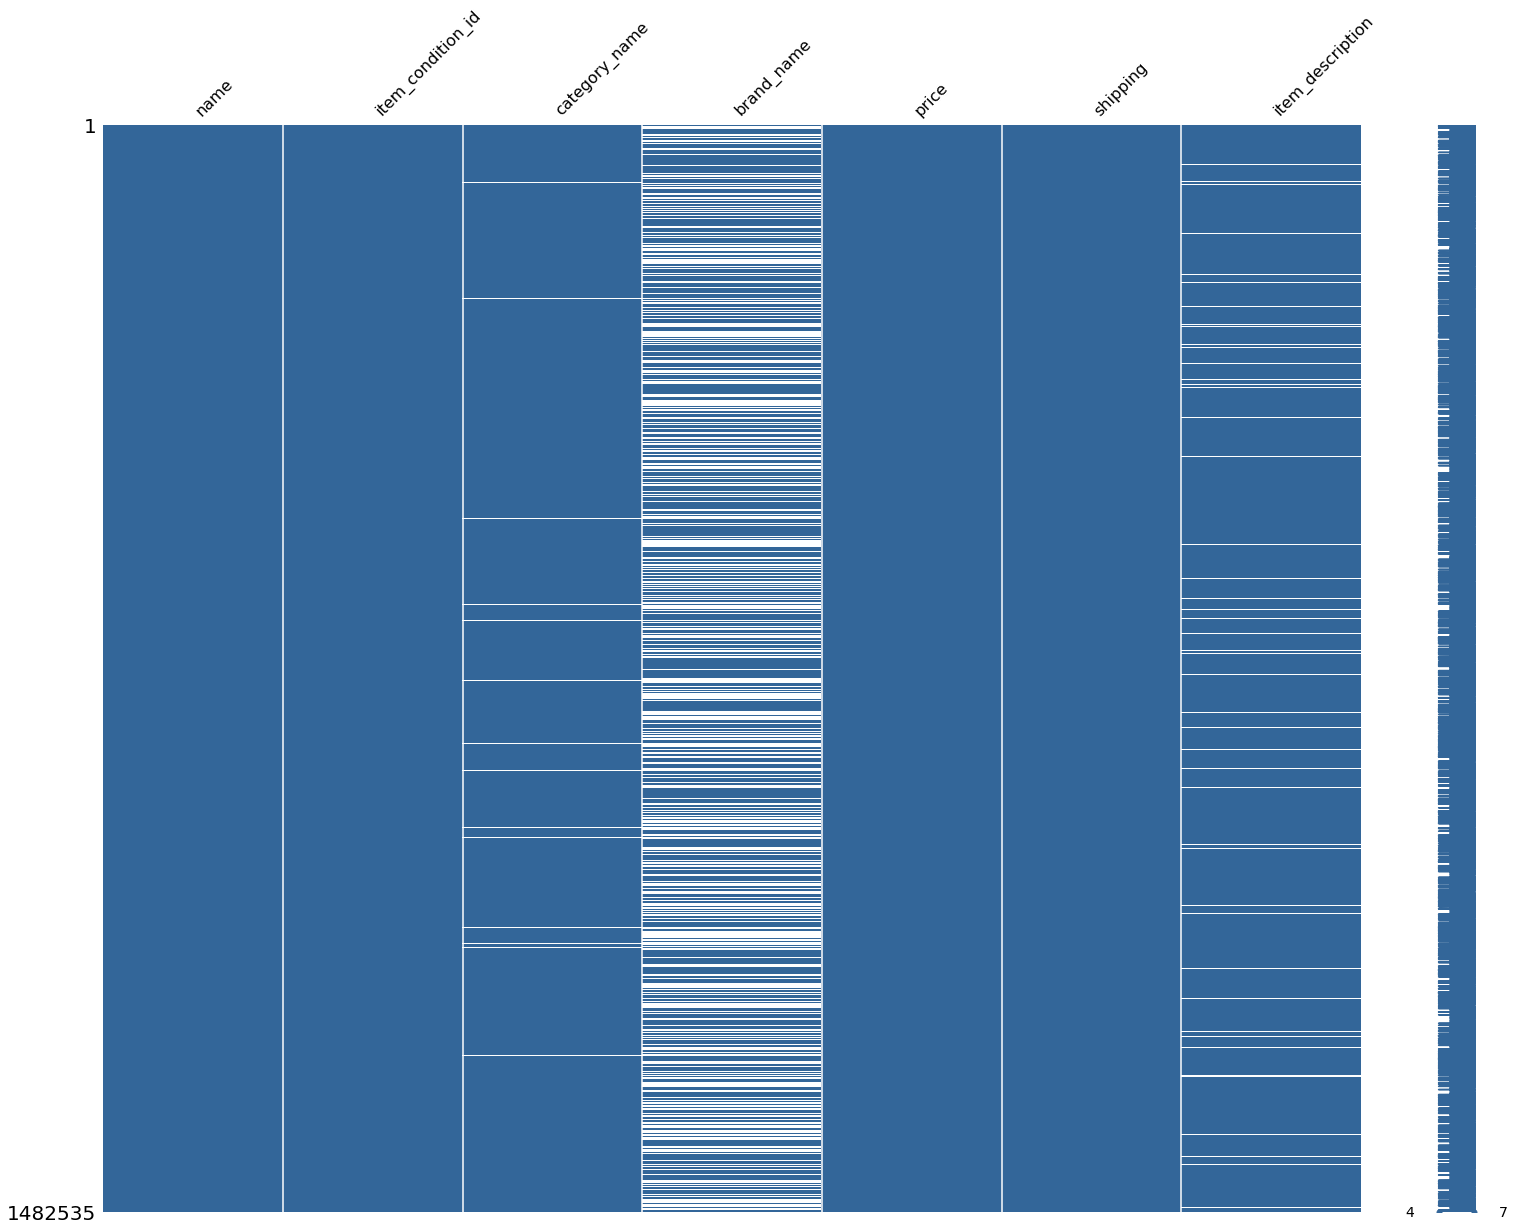

In [6]:
import missingno as msno
msno.matrix(df=df_train_copy.iloc[:,1:8], figsize=(25, 20), color=(0.2, 0.4, 0.6))

In [7]:
df_test_copy = df_test
df_test_copy.category_name.replace(to_replace = "Other/Other/Other",value = np.NaN, inplace = True)
df_test_copy.brand_name.replace(to_replace = "Unknown",value = np.NaN, inplace = True)
df_test_copy.item_description.replace(to_replace = "No description yet",value = np.NaN, inplace = True)

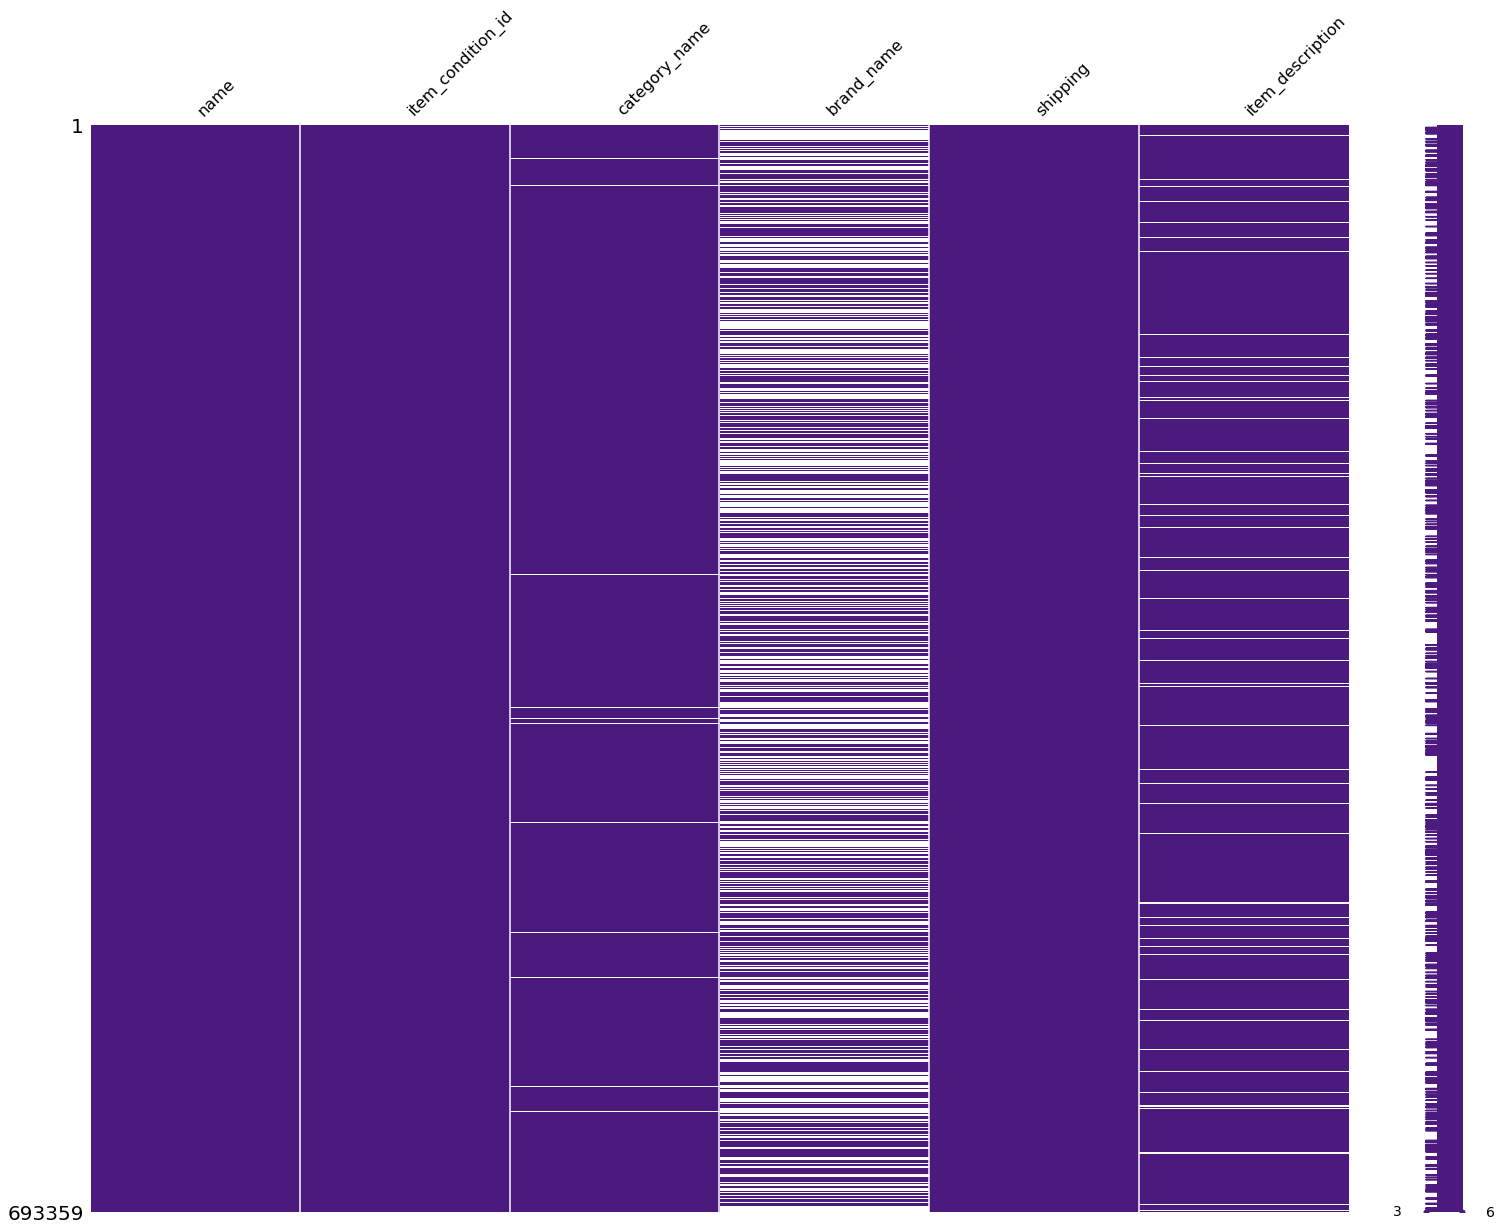

In [8]:
msno.matrix(df=df_test_copy.iloc[:,1:8], figsize=(25, 20), color=(0.3, 0.1, 0.5))

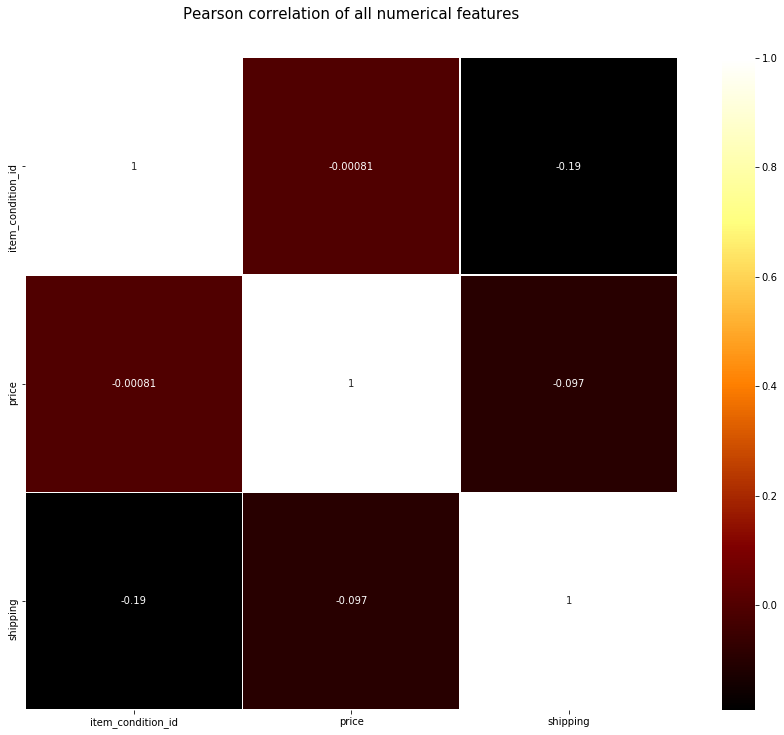

In [9]:
# draw correlatio map for all numerical variables, in train set
df_train_tmp = df_train.drop(['train_id'], axis = 1, inplace = False)
train_num = df_train_tmp.select_dtypes(include=['int64', 'float64'])
colormap = plt.cm.afmhot
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of all numerical features', y=1.05, size=15)
sns.heatmap(train_num.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
del df_train_tmp

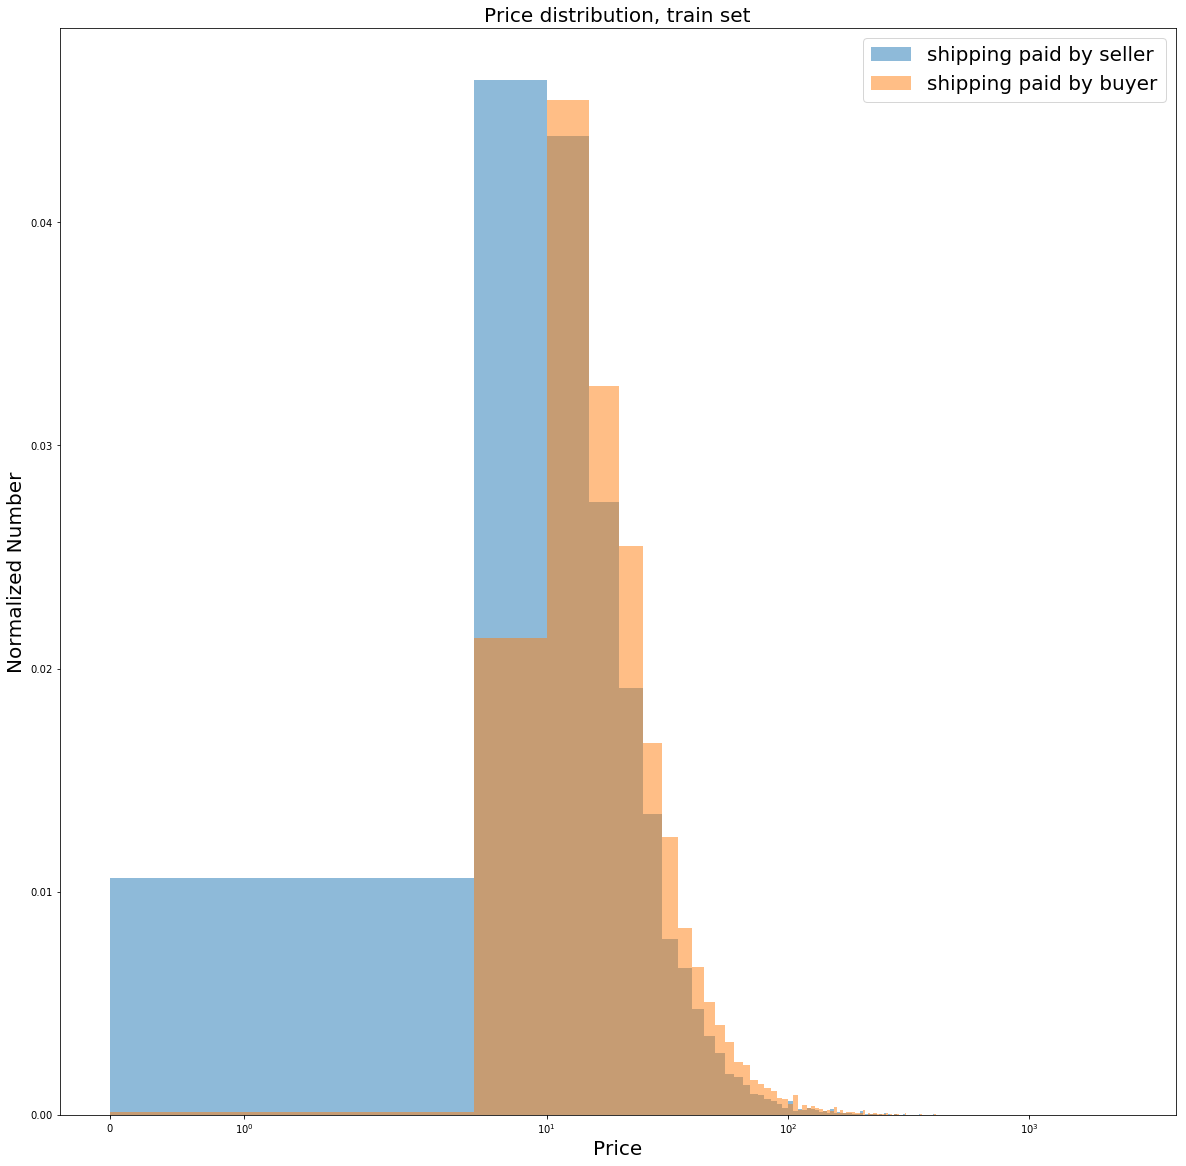

In [10]:
# plot shipping id vs price, good
plt.figure(figsize=(20, 20))
xmax = 2500
bins = xmax/5
plt.xscale('symlog')
#plt.yscale('log')
plt.hist(df_train[df_train['shipping']==1]['price'], int(bins), normed=True, range=[0, int(xmax)],
         alpha=0.5, label='shipping paid by seller')
plt.hist(df_train[df_train['shipping']==0]['price'], int(bins), normed=True, range=[0, int(xmax)],
         alpha=0.5, label='shipping paid by buyer')
plt.title('Price distribution, train set', fontsize=20)
plt.xlabel('Price', fontsize=20)
plt.ylabel('Normalized Number', fontsize=20)
plt.legend(fontsize=20)
plt.show()

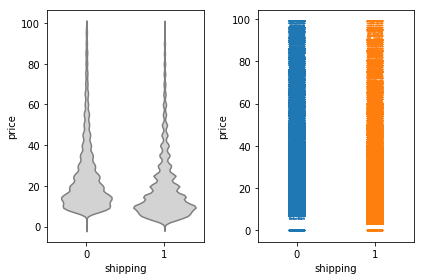

In [11]:
# shipping vs price
# violin plot
plt.subplot(1,2,1)
sns.violinplot(x='shipping', y='price', data=df_train[df_train.price < 100], inner=None, color='lightgray')

# strip plot
plt.subplot(1,2,2)
sns.stripplot(x='shipping', y='price', data=df_train[df_train.price < 100], jitter=True, size=1.5)

# Display the plot
plt.tight_layout()
plt.show()

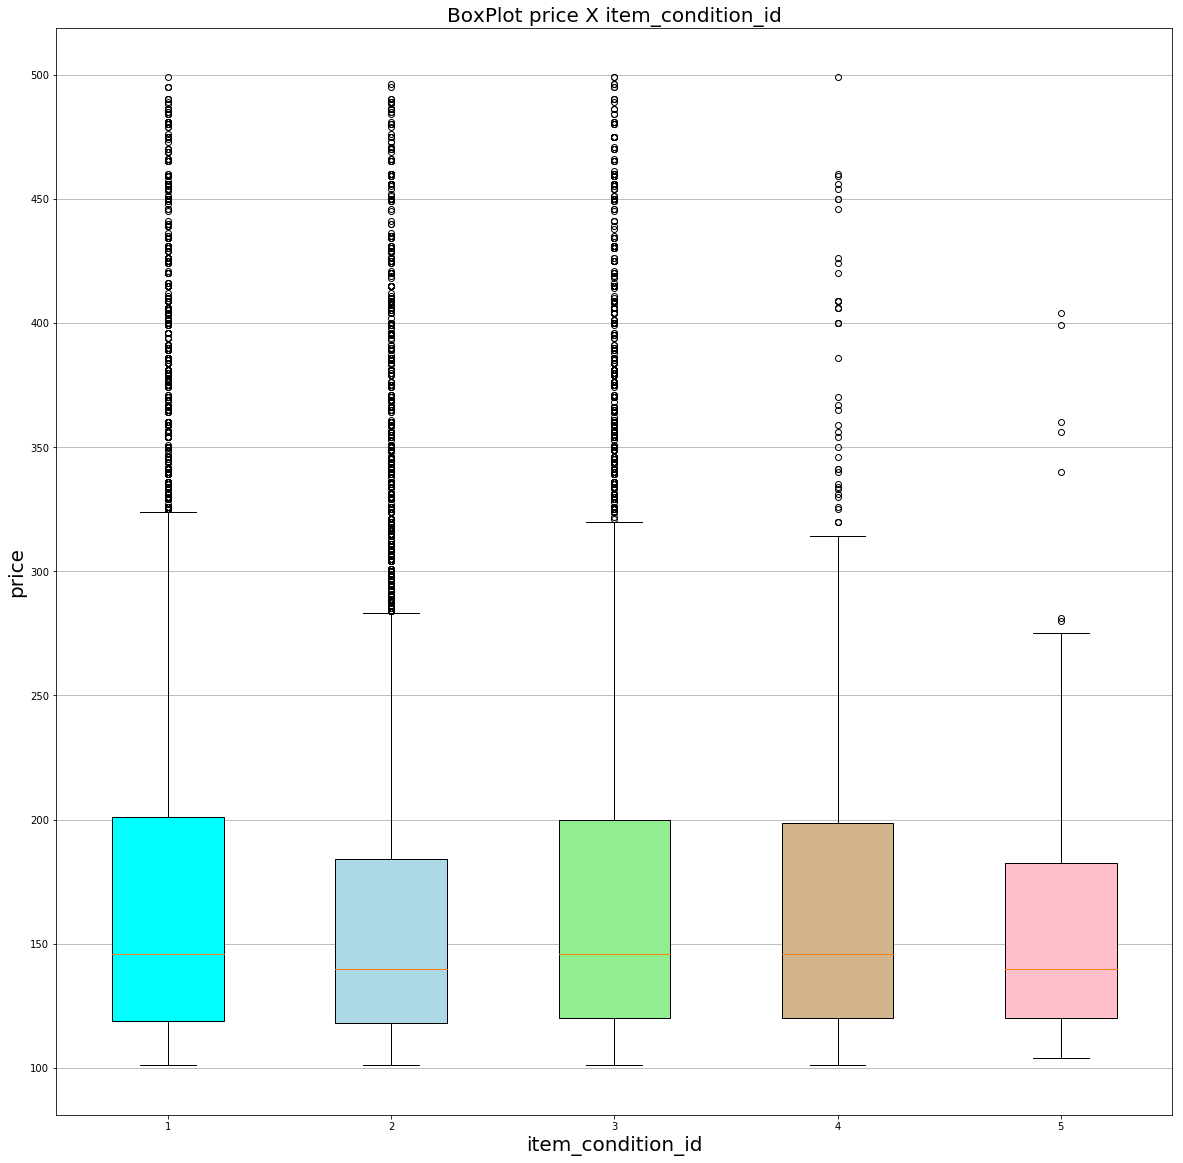

In [12]:
# plot price vs item condition
pricecut_lo = 100
pricecut_hi = 500
df_train_tmp = df_train[ (df_train['price'] > pricecut_lo) & (df_train['price'] < pricecut_hi) ]
my_plot = []
for i in df_train['item_condition_id'].unique():
    my_plot.append(df_train_tmp[df_train_tmp['item_condition_id']==i]['price'])

fig, axes = plt.subplots(figsize=(20, 20))
bp = axes.boxplot(my_plot,vert=True,patch_artist=True,labels=range(1,6)) 

colors = ['cyan', 'lightblue', 'lightgreen', 'tan', 'pink']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

axes.yaxis.grid(True)

plt.title('BoxPlot price X item_condition_id', fontsize=20)
plt.xlabel('item_condition_id', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.show()
del df_train_tmp

In [13]:
# working on text features, name, category_name, brand_name, and item_description
df_train_text = df_train
df_train_text.category_name.fillna(value = "Other/Other/Other", inplace = True)
df_train_text.brand_name.fillna(value = "Unknown", inplace = True)
df_train_text.item_description.fillna(value = "No description yet", inplace = True)
df_train_text["catname_l1"] = df_train_text.category_name.str.extract("([^/]+)/[^/]+/[^/]+")
df_train_text["catname_l2"] = df_train_text.category_name.str.extract("[^/]+/([^/]+)/[^/]+")
df_train_text["catname_l3"] = df_train_text.category_name.str.extract("[^/]+/[^/]+/([^/]+)")
df_train_text.drop(['category_name'], axis=1, inplace=True)
df_train_text.head()

/home/hua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)

/home/hua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)

/home/hua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



,train_id,name,item_condition_id,brand_name,price,shipping,item_description,catname_l1,catname_l2,catname_l3
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Unknown,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Unknown,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Unknown,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


/home/hua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

divide by zero encountered in log



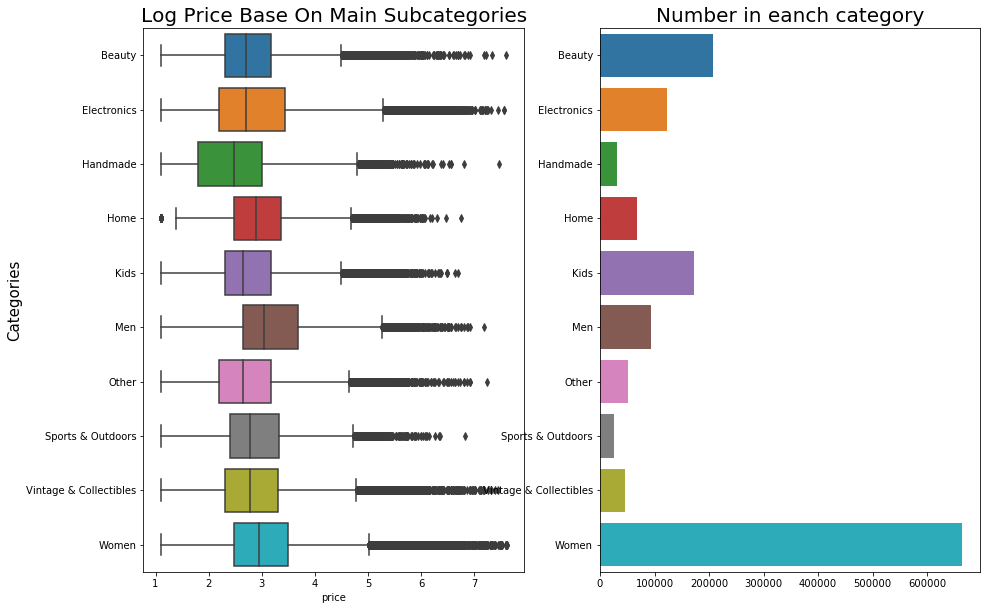

In [14]:
# category_name, and plots
category = df_train_text.catname_l1
order = sorted(category.unique())
fig, ax = plt.subplots(1, 2, figsize = (15, 10))
sns.boxplot(x = np.log(df_train_text.price), y = category, orient = "h", order = order, ax = ax[0])
ax[0].set_title("Log Price Base On Main Subcategories", fontsize = 20)
ax[0].set_ylabel("Categories", fontsize = 15)
sns.barplot(category.value_counts().values, category.value_counts().index, order = order, ax = ax[1])
ax[1].set_title("Number in eanch category", fontsize = 20)
plt.show()

There are 4810 unique known brands.


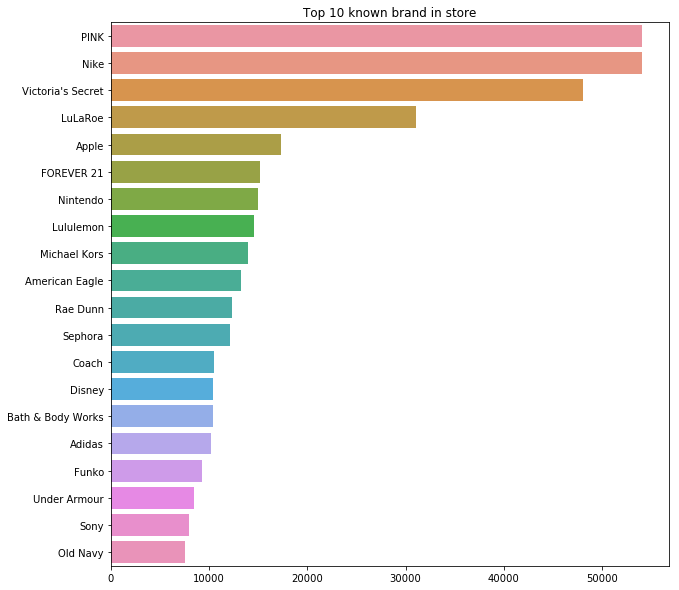

In [15]:
# brand_name, and plots
brands = df_train_text["brand_name"].value_counts()
print("There are", brands.size, "unique known brands.")
plt.figure(figsize = (10, 10))
#skip index 0, because it is unknown
sns.barplot(brands[1:21].values, brands[1:21].index)
plt.title("Top 10 known brand in store")
plt.show()

(-0.5, 1499.5, 1499.5, -0.5)

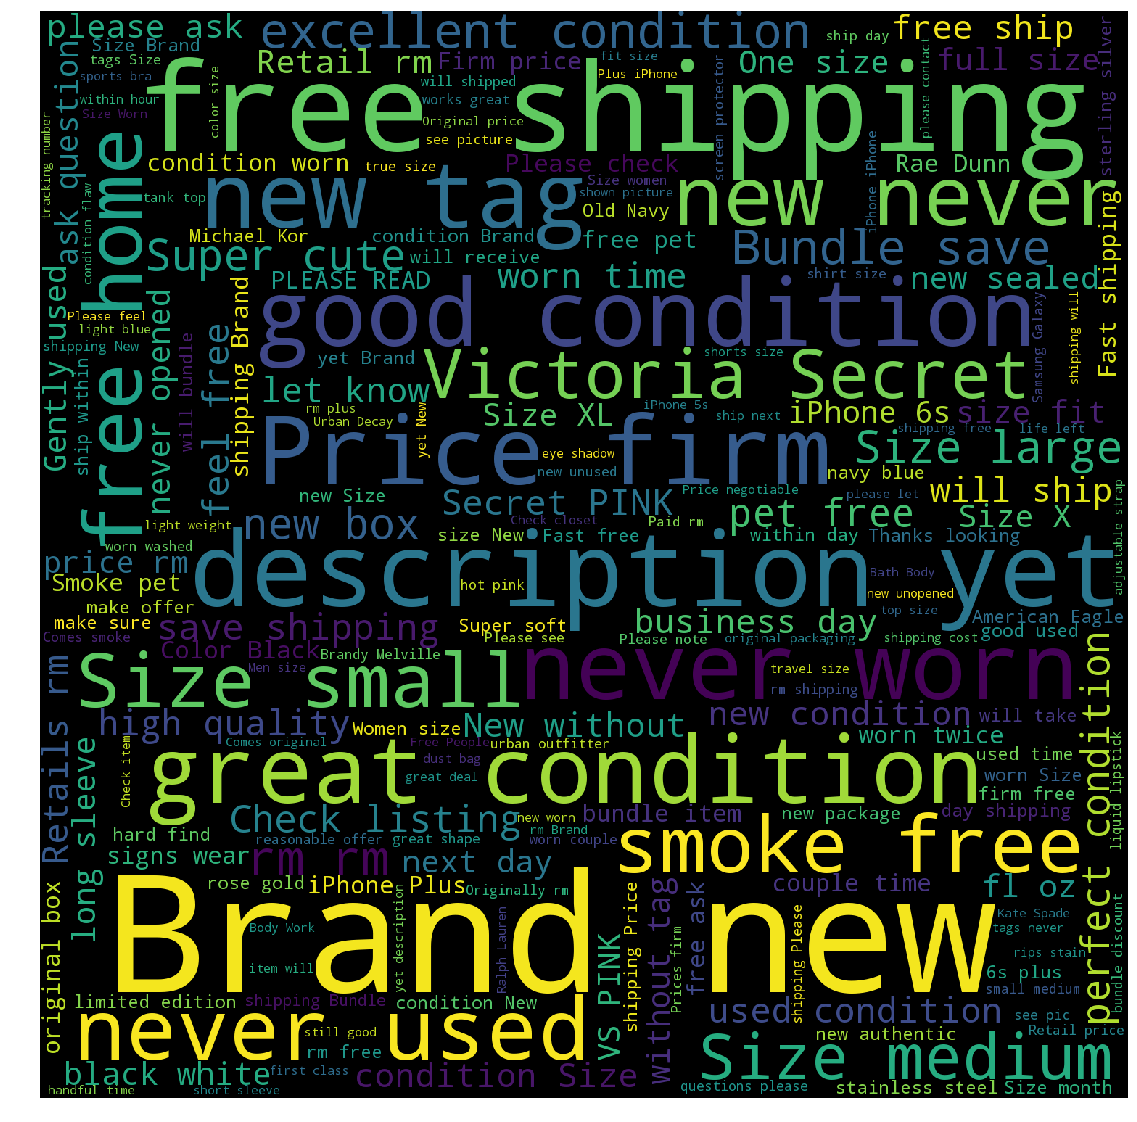

In [16]:
# ok, now we can look at text, item_description and name
# first play with world cloud, bonus...
from wordcloud import WordCloud
cloud = WordCloud(width=1500, height=1500).generate(" ".join(df_train['item_description'].astype(str)))
plt.figure(figsize=(20, 20))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
# Then, working on the counting variables, ngram count, ratio, statistics position...etc
